In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

**OPIS BAZE**

In [2]:
#uvodimo bazu
df= pd.read_csv('Life-Expectancy-Data.csv')
column_names = df.columns
print(column_names)
df.head()

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [3]:
df.shape

(2864, 21)

In [4]:
#provera da li imamo nedostajajućih vrednosti
df.isna().any()

Country                        False
Region                         False
Year                           False
Infant_deaths                  False
Under_five_deaths              False
Adult_mortality                False
Alcohol_consumption            False
Hepatitis_B                    False
Measles                        False
BMI                            False
Polio                          False
Diphtheria                     False
Incidents_HIV                  False
GDP_per_capita                 False
Population_mln                 False
Thinness_ten_nineteen_years    False
Thinness_five_nine_years       False
Schooling                      False
Economy_status_Developed       False
Economy_status_Developing      False
Life_expectancy                False
dtype: bool

In [5]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [6]:
#deskriptivni pogled na bazu
round(df.describe(),2)

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00
mean,2007.50,30.36,42.94,192.25,4.82,84.29,77.34,25.03,86.50,86.27,0.89,11540.92,36.68,4.87,4.90,7.63,0.21,0.79,68.86
std,4.61,27.54,44.57,114.91,3.98,16.00,18.66,2.19,15.08,15.53,2.38,16934.79,136.49,4.44,4.53,3.17,0.41,0.41,9.41
min,2000.00,1.80,2.30,49.38,0.00,12.00,10.00,19.80,8.00,16.00,0.01,148.00,0.08,0.10,0.10,1.10,0.00,0.00,39.40
25%,2003.75,8.10,9.67,106.91,1.20,78.00,64.00,23.20,81.00,81.00,0.08,1415.75,2.10,1.60,1.60,5.10,0.00,1.00,62.70
50%,2007.50,19.60,23.10,163.84,4.02,89.00,83.00,25.50,93.00,93.00,0.15,4217.00,7.85,3.30,3.40,7.80,0.00,1.00,71.40
75%,2011.25,47.35,66.00,246.79,7.78,96.00,93.00,26.40,97.00,97.00,0.46,12557.00,23.69,7.20,7.30,10.30,0.00,1.00,75.40
max,2015.00,138.10,224.90,719.36,17.87,99.00,99.00,32.10,99.00,99.00,21.68,112418.00,1379.86,27.70,28.60,14.10,1.00,1.00,83.80


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [35]:
df.Region.unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

**DESKRIPTIVNE STATISTIKE I SREDJIVANJE BAZE ZA DALJE ANALIZE**

C:\Users\tinaj\AppData\Local\Temp\ipykernel_5240\1421443906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Country', data=brojzm, palette='viridis')


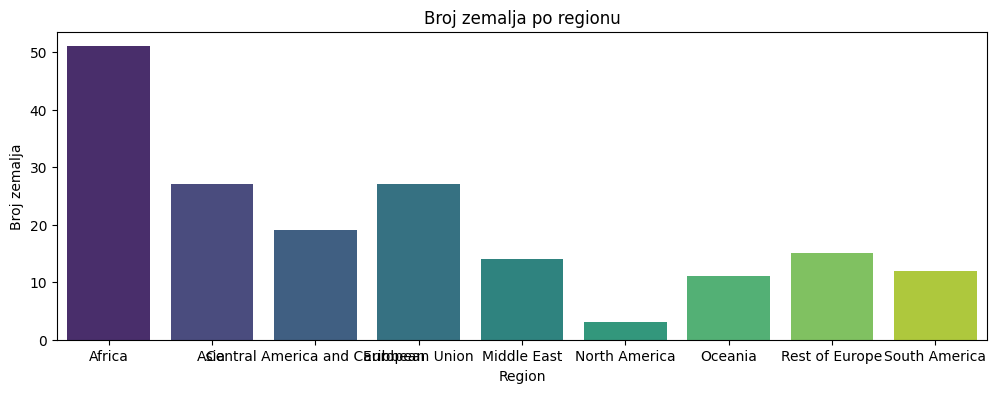

In [125]:
brojzm = df.groupby('Region')['Country'].nunique().reset_index()

plt.figure(figsize=(12, 4))
sns.barplot(x='Region', y='Country', data=brojzm, palette='viridis')
plt.xlabel('Region')
plt.ylabel('Broj zemalja')
plt.title('Broj zemalja po regionu')
plt.show()

In [189]:
#Prosecan ocekivani zivotni vek po regionima
prosekg = df.groupby('Region').Life_expectancy.mean()
prosekg.columns =['Region', 'Life Expectancy']
print(prosekg)

Region
Africa                           57.847304
Asia                             69.454861
Central America and Caribbean    72.437500
European Union                   77.715046
Middle East                      73.975446
North America                    77.841667
Oceania                          69.517614
Rest of Europe                   74.525417
South America                    72.780729
Name: Life_expectancy, dtype: float64


In [36]:
nkolone = df.select_dtypes(include=[np.number]).columns
nkor = df[nkolone].corr()

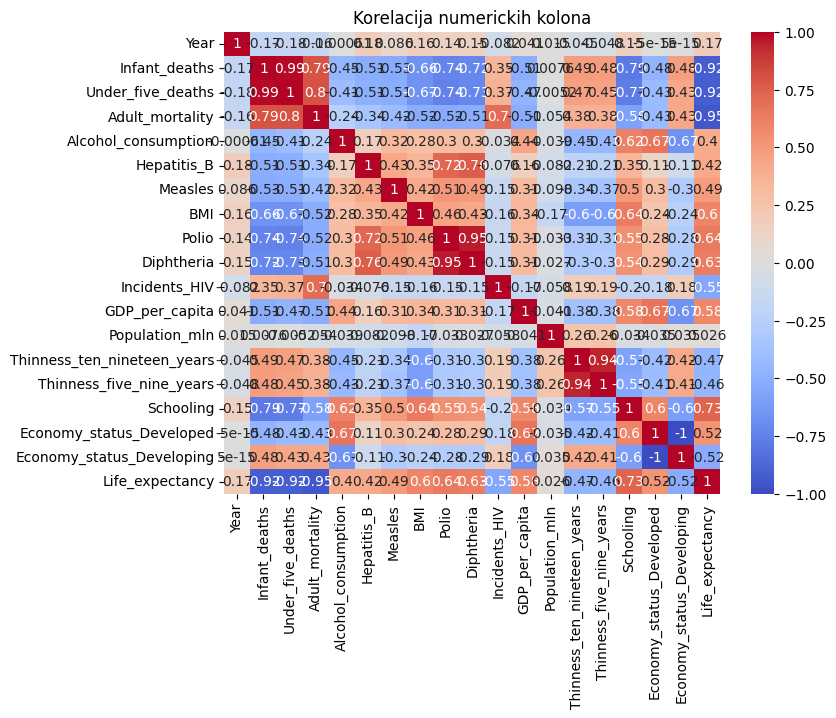

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(nkor, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelacija numerickih kolona')
plt.show()

In [8]:
#Uklanjanje kolona koje su visoko korelisane sa drugima kako bi se izbegla kolinearnost
df.drop(['Infant_deaths','Under_five_deaths','Thinness_five_nine_years','Diphtheria'], axis=1, inplace=True)

C:\Users\tinaj\AppData\Local\Temp\ipykernel_5240\4188618862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Life_expectancy', data=df, palette='viridis')


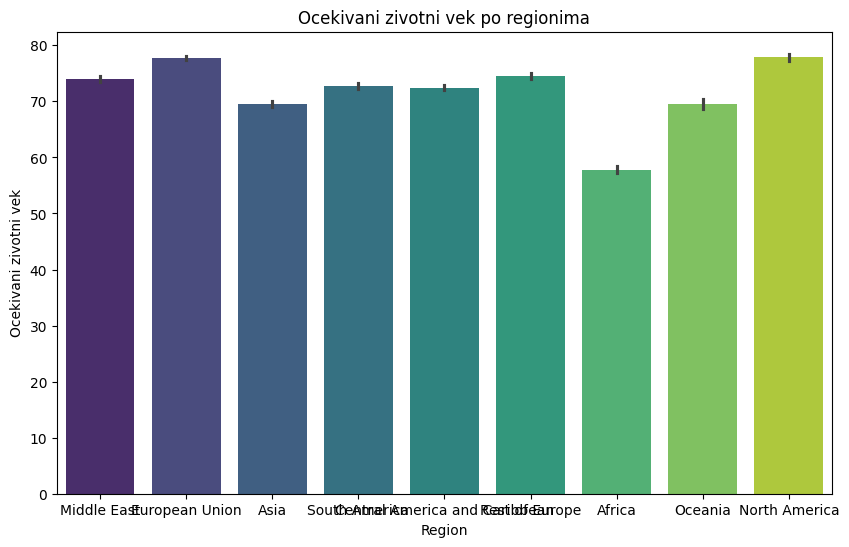

In [132]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Life_expectancy', data=df, palette='viridis')
plt.xlabel('Region')
plt.ylabel('Ocekivani zivotni vek')
plt.title('Ocekivani zivotni vek po regionima')
plt.show()

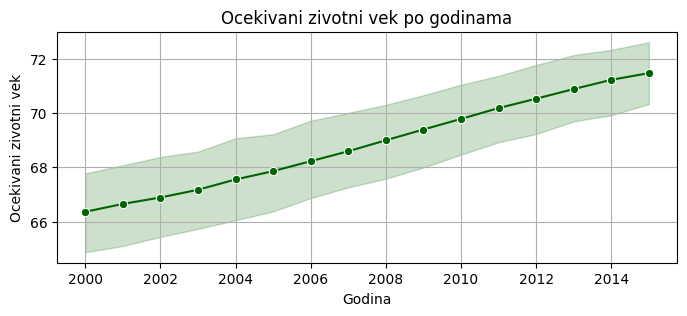

In [19]:
plt.figure(figsize=(8, 3))
sns.lineplot(x='Year', y='Life_expectancy', data=df, marker='o', color='darkgreen')
plt.xlabel('Godina')
plt.ylabel('Ocekivani zivotni vek')
plt.title('Ocekivani zivotni vek po godinama')
plt.grid(True)
plt.show()

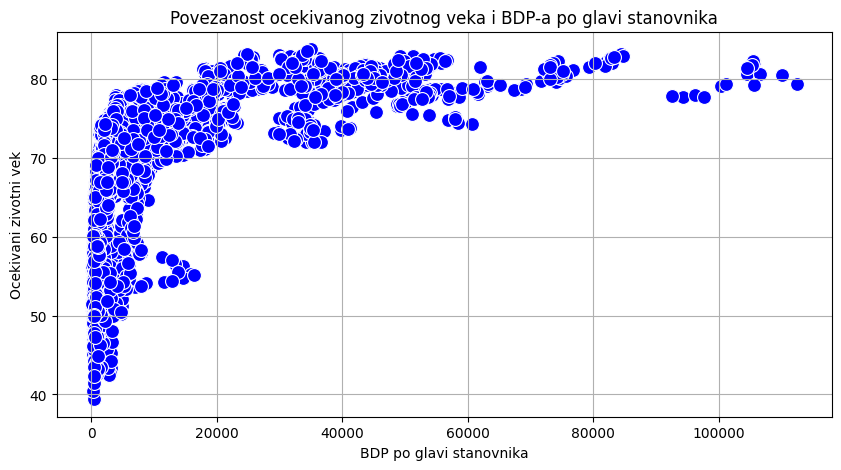

In [21]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='GDP_per_capita', y='Life_expectancy', data=df, color='blue', s=100)
plt.xlabel('BDP po glavi stanovnika')
plt.ylabel('Ocekivani zivotni vek')
plt.title('Povezanost ocekivanog zivotnog veka i BDP-a po glavi stanovnika')
plt.grid(True)
plt.show()

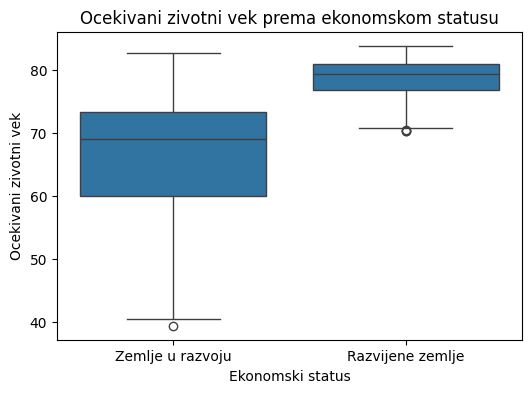

In [139]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Economy_status_Developed', y='Life_expectancy', data=df)
plt.xlabel('Ekonomski status')
plt.ylabel('Ocekivani zivotni vek')
plt.title('Ocekivani zivotni vek prema ekonomskom statusu')
plt.xticks(range(2), ['Zemlje u razvoju', 'Razvijene zemlje'])
plt.show()

In [9]:
#Pravimo vestacke promenjive binarnog tipa koje zamenjuju kolonu Region jer nju u ovom obliku ne mozemo koristiti u daljoj analizi
enc = pd.get_dummies(df['Region'], dtype=int)
df = pd.concat([df, enc], axis=1)


In [10]:
"""
Moramo izbaciti jedan region iz vestackih koje smo napravili da bi izbegli kolinearnost, takodje kolona 'Country' jer je ne
koristimo u daljoj analizi a smeta zato sto je object tipa a nama trebaju numericki podaci kako bi mogli da primenjujemo modele
masinskog ucenja
"""
df = df.drop(columns=['Country', 'Central America and Caribbean'])
df.head()

,Region,Year,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Incidents_HIV,GDP_per_capita,...,Economy_status_Developing,Life_expectancy,Africa,Asia,European Union,Middle East,North America,Oceania,Rest of Europe,South America
0,Middle East,2015,105.8240,1.32,97,65,27.8,97,0.08,11006,...,1,76.5,0,0,0,1,0,0,0,0
1,European Union,2015,57.9025,10.35,97,94,26.0,97,0.09,25742,...,0,82.8,0,0,1,0,0,0,0,0
2,Asia,2007,201.0765,1.57,60,35,21.2,67,0.13,1076,...,1,65.4,0,1,0,0,0,0,0,0
3,South America,2006,222.1965,5.68,93,74,25.3,92,0.79,4146,...,1,67.0,0,0,0,0,0,0,0,1
4,Middle East,2012,57.9510,2.89,97,89,27.0,94,0.08,33995,...,0,81.7,0,0,0,1,0,0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Region                       2864 non-null   object 
 1   Year                         2864 non-null   int64  
 2   Adult_mortality              2864 non-null   float64
 3   Alcohol_consumption          2864 non-null   float64
 4   Hepatitis_B                  2864 non-null   int64  
 5   Measles                      2864 non-null   int64  
 6   BMI                          2864 non-null   float64
 7   Polio                        2864 non-null   int64  
 8   Incidents_HIV                2864 non-null   float64
 9   GDP_per_capita               2864 non-null   int64  
 10  Population_mln               2864 non-null   float64
 11  Thinness_ten_nineteen_years  2864 non-null   float64
 12  Schooling                    2864 non-null   float64
 13  Economy_status_Dev

**K MEANS**

In [11]:
#Izbacujemo kolonu region jer smo napravili vestacke promenjive koje je zamenjuju
df.drop('Region', axis=1, inplace=True)

In [12]:
"""
Iz deskritivne statistike sa pocetka vidimo da moramo skalirati podatke, ovde cemo ih standardizovati
na malo drugaciji nacin. Koristimo min max metodu i dobijamo 1 do 10 skalu.
"""

dfs=((df - df.min())/(df.max() - df.min())) * 9 + 1
round(dfs.describe(),2)

,Year,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Incidents_HIV,GDP_per_capita,Population_mln,...,Economy_status_Developing,Life_expectancy,Africa,Asia,European Union,Middle East,North America,Oceania,Rest of Europe,South America
count,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,...,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00
mean,5.50,2.92,3.43,8.48,7.81,4.83,8.76,1.37,1.91,1.24,...,8.14,6.97,3.56,2.36,2.36,1.70,1.15,1.55,1.75,1.60
std,2.77,1.54,2.01,1.65,1.89,1.61,1.49,0.99,1.36,0.89,...,3.65,1.91,4.06,3.22,3.22,2.42,1.16,2.16,2.49,2.25
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.25,1.77,1.60,7.83,6.46,3.49,8.22,1.03,1.10,1.01,...,10.00,5.72,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
50%,5.50,2.54,3.02,8.97,8.38,5.17,9.41,1.06,1.33,1.05,...,10.00,7.49,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
75%,7.75,3.65,4.92,9.69,9.39,5.83,9.80,1.19,1.99,1.15,...,10.00,8.30,10.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,...,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


In [89]:
#Funkcija za slucajne centroide
def slucajni_cen(dfs, k):
    centroids = []
    for i in range(k):
        centroid = dfs.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [90]:
#funkcija za pronalazenje najblizeg centroida
def get_labels(dfs, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((dfs - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [91]:
#Funkcija za nove centroide 
def novi_centroidi(dfs, labels,k):  
    centroids = dfs.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [92]:
#Funkcija koja prebacivanje podatake u 2-dimenzijonalne,iscrtava naše klastere, boji ih i prikazuje njihove centroide
def plot_clusters(dfs, labels, centroids, iteration):
    pca = PCA(n_components=2)
    dfs_2d = pca.fit_transform(dfs)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteracija {iteration}')
    plt.scatter(x=dfs_2d[:,0], y=dfs_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

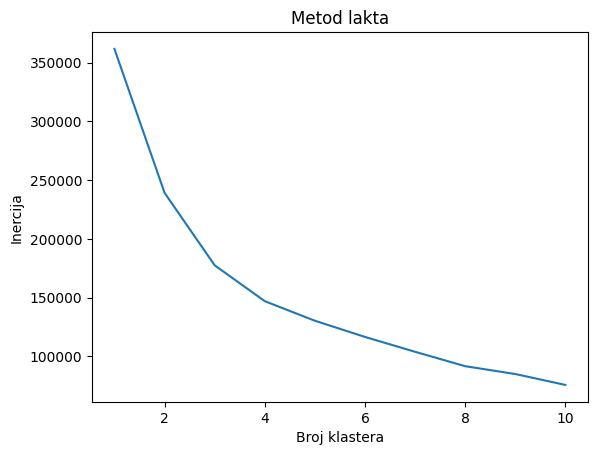

In [97]:
#odredjivanje optimalnog broja k
wcss = []
k_values=range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dfs)
    wcss.append(kmeans.inertia_)
plt.plot(k_values, wcss)
plt.title('Metod lakta')
plt.xlabel('Broj klastera')
plt.ylabel('Inercija')
plt.show()

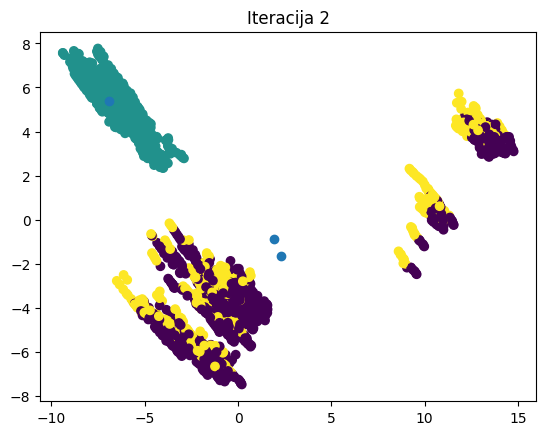

In [95]:
#Primenjuje ovo sto smo napravili da bi uradili trazeno
max_iterations = 100
k = 3

centroids = slucajni_cen(dfs, k)
stari_cent = pd.DataFrame()
iteration = 1
labels = get_labels(dfs, centroids)

while iteration < max_iterations and not centroids.equals(stari_cent):
    stari_cent = centroids
    lables = get_labels(dfs,centroids)
    centroids = novi_centroidi(dfs, labels,k)
    plot_clusters(dfs, labels, centroids, iteration)
    iteration +=1


In [51]:
centroids

,0,1,2
Year,6.870519,3.802081,5.766315
Adult_mortality,2.933648,2.713188,1.839535
Alcohol_consumption,2.918100,2.523875,4.199079
Hepatitis_B,7.607556,8.424856,8.398459
Measles,7.133362,7.683695,7.279923
BMI,3.942026,4.573242,5.061757
Polio,7.982560,8.677226,9.074567
Incidents_HIV,1.341484,1.252833,1.037187
GDP_per_capita,1.669653,1.465966,2.316686
Population_mln,1.164229,1.150328,1.149398


In [54]:
#Primer podataka 
df[labels==1]

,Year,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Incidents_HIV,GDP_per_capita,Population_mln,...,Economy_status_Developing,Life_expectancy,Africa,Asia,European Union,Middle East,North America,Oceania,Rest of Europe,South America
14,2006,63.2435,10.240,88,71,25.0,94,0.08,79368,7.48,...,0,81.5,0,0,0,0,0,0,1,0
15,2001,80.4955,5.490,88,90,25.7,91,0.03,68489,4.51,...,0,78.8,0,0,0,0,0,0,1,0
18,2005,68.7680,7.980,83,84,22.6,95,0.17,33099,127.77,...,0,81.9,0,1,0,0,0,0,0,0
30,2005,253.2655,0.730,95,76,22.8,95,0.19,1489,0.65,...,1,65.3,0,1,0,0,0,0,0,0
31,2010,56.9105,10.010,88,83,25.1,96,0.06,82027,7.82,...,0,82.2,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,2000,274.4510,5.190,48,65,21.1,57,0.10,936,5.32,...,1,58.8,0,1,0,0,0,0,0,0
2856,2014,55.5820,8.400,83,94,22.7,99,0.17,34387,127.28,...,0,83.6,0,1,0,0,0,0,0,0
2857,2000,239.7160,12.920,70,92,25.7,99,0.05,2617,9.98,...,1,68.9,0,0,0,0,0,0,1,0
2859,2000,291.8240,0.092,72,64,20.8,41,0.49,399,11.33,...,1,49.9,1,0,0,0,0,0,0,0


**LINEARNA REGRESIJA**

In [203]:
#Odredjujem zavisnu promenjivu i ostale nezavisne 
Y=df["Life_expectancy"]
X = df.drop(columns="Life_expectancy")
X.columns

Index(['Year', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B',
       'Measles', 'BMI', 'Polio', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing', 'Africa',
       'Asia', 'European Union', 'Middle East', 'North America', 'Oceania',
       'Rest of Europe', 'South America'],
      dtype='object')

In [204]:
#Odredjivanje test i train uzorka
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [205]:
#skaliranje
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [206]:
#korelacioni koeficijenti između različitih atributa u datasetu i varijable Life_expectancy
feature_names = [col for col in df.columns if col != 'Life_expectancy']
corrcoefs = []
for feature in feature_names: 
    corrcoef = np.corrcoef(X[feature].values, Y)[0, 1]
    corrcoefs.append(corrcoef)
    print(feature, corrcoef)
"""
Zakljucujemo da je previse mala vrednost samo kod 'Population_mln' i odredjenih vestackih varijabli pa necemo nista izbaciti
bez potrebe.
""""

Year 0.17435894328215845
Adult_mortality -0.9453603642730645
Alcohol_consumption 0.3991591075791727
Hepatitis_B 0.41780443201507816
Measles 0.49001858940944215
BMI 0.5984233246973865
Polio 0.6412174553454274
Incidents_HIV -0.5530274644851233
GDP_per_capita 0.5830897215324404
Population_mln 0.026297879724181548
Thinness_ten_nineteen_years -0.4678244950192913
Schooling 0.7324844688915004
Economy_status_Developed 0.523790978718642
Economy_status_Developing -0.5237909787186421
Africa -0.7389378649734415
Asia 0.02683616560920274
European Union 0.39703822706579267
Middle East 0.15857240436951747
North America 0.12474981578885284
Oceania 0.01800054279368139
Rest of Europe 0.18232459814410465
South America 0.11187233310225102


In [207]:
#Treniramo nas model
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [208]:
#predvidjanja pomoću linearnog regresionog modela na trening i test skupovima podataka
Y_train_pred_lr = lr.predict(X_train)
Y_test_pred_lr = lr.predict(X_test)

In [209]:
#vrednost slobodnog clana
lr.intercept_

68.78943692710605

In [210]:
#dobijamo rezultate
mse_lr_train = mean_squared_error(y_true=Y_train, y_pred=Y_train_pred_lr)
mse_lr_test = mean_squared_error(y_true=Y_test, y_pred=Y_test_pred_lr)

r2_lr_train = r2_score(y_true=Y_train, y_pred=Y_train_pred_lr)
r2_lr_test = r2_score(y_true=Y_test, y_pred=Y_test_pred_lr)

In [211]:
print(f'Trening srednja kvadratna greška: {mse_lr_train:.2f}')
print(f'Test srednja kvadratna greška: {mse_lr_test:.2f}')
print(f'Trening R-kvadrat: {r2_lr_train:.2f}')
print(f'Test R-kvadrat: {r2_lr_test:.2f}')

Trening srednja kvadratna greška: 2.97
Test srednja kvadratna greška: 2.77
Trening R-kvadrat: 0.97
Test R-kvadrat: 0.97


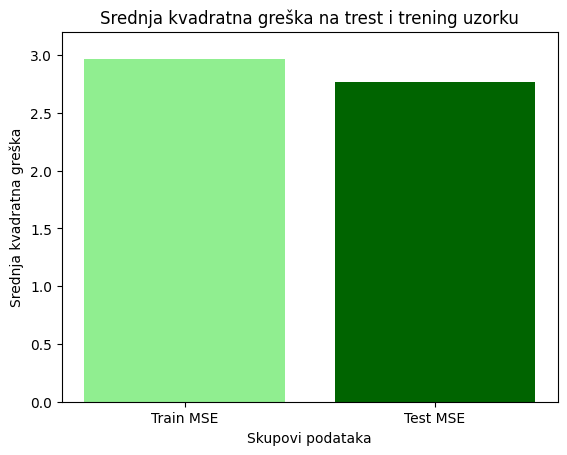

In [212]:
msee = ['Train MSE', 'Test MSE']
vrednosti = [mse_lr_train, mse_lr_test]


plt.bar(msee, vrednosti, color=['lightgreen', 'darkgreen'])
plt.xlabel('Skupovi podataka')
plt.ylabel('Srednja kvadratna greška')
plt.title('Srednja kvadratna greška na trest i trening uzorku')
plt.ylim(0, 3.2)  
plt.show()

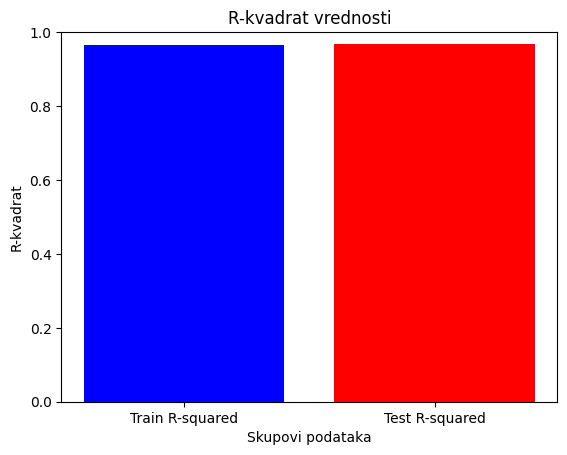

In [213]:
rr = ['Train R-squared', 'Test R-squared']
vrednosti = [r2_lr_train, r2_lr_test]

plt.bar(rr, vrednosti, color=['blue', 'red'])
plt.xlabel('Skupovi podataka')
plt.ylabel('R-kvadrat')
plt.title('R-kvadrat vrednosti')
plt.ylim(0, 1) 
plt.show()

In [214]:
y_predicted = lr.predict(X_test)

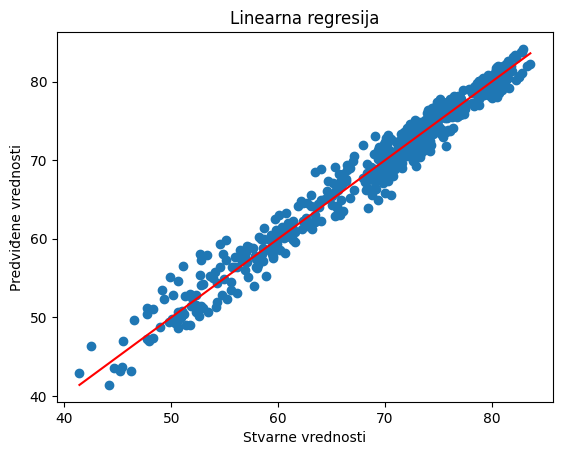

In [215]:
#odnos između stvarnih vrednosti i predvidjenih vrednosti
plt.scatter(Y_test,y_predicted)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], "red")
plt.title("Linearna regresija")
plt.xlabel("Stvarne vrednosti")
plt.ylabel("Predviđene vrednosti")
plt.show()

**DRVO ODLUCIVANJA**

In [216]:
#Kreiramo model odlucivanja, trazim najbolje parametre za moj model
dt = DecisionTreeRegressor(random_state=123)
najboljav = GridSearchCV(dt, {'max_depth':range(1,20),'min_samples_split':range(2,20)}, cv=10)
najboljav.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_split': range(2, 20)})

In [172]:
print("Posle treniranja modela dolazimo do zakljucka da su parametri: ", '\n', najboljav.best_params_)

Posle treniranja modela dolazimo do zakljucka da su parametri:  
 {'max_depth': 18, 'min_samples_split': 2}


In [173]:
#Dodeljujemo najbolje pronadjen model
dt = najboljav.best_estimator_

In [174]:
#predvidjanje modela odlučivanja na trening i test skupovima podataka
Y_train_pred_dt = dt.predict(X_train)
Y_test_pred_dt = dt.predict(X_test)

In [175]:
mse_dt_train = mean_squared_error(y_true=Y_train, y_pred=Y_train_pred_dt)
mse_dt_test = mean_squared_error(y_true=Y_test, y_pred=Y_test_pred_dt)

r2_dt_train = r2_score(y_true=Y_train, y_pred=Y_train_pred_dt)
r2_dt_test = r2_score(y_true=Y_test, y_pred=Y_test_pred_dt)

In [176]:
print(f'Trening srednja kvadratna greška: {mse_dt_train:.2f}')
print(f'Test srednja kvadratna greška: {mse_dt_test:.2f}')
print(f'Trening R-kvadrat: {r2_dt_train:.2f}')
print(f'Test R-kvadrat: {r2_dt_test:.2f}')

Trening srednja kvadratna greška: 0.00
Test srednja kvadratna greška: 1.03
Trening R-kvadrat: 1.00
Test R-kvadrat: 0.99


In [ ]:
"""Izgleda da mi u metodi drveta odlucivanja postoji problem prenaucenosti, probao sam da dodam i dodatne metode regularizacije 
ali u modelu je samo porasla mse a nije se mnogo popravio tako da sam ostao na ovom modelu"""

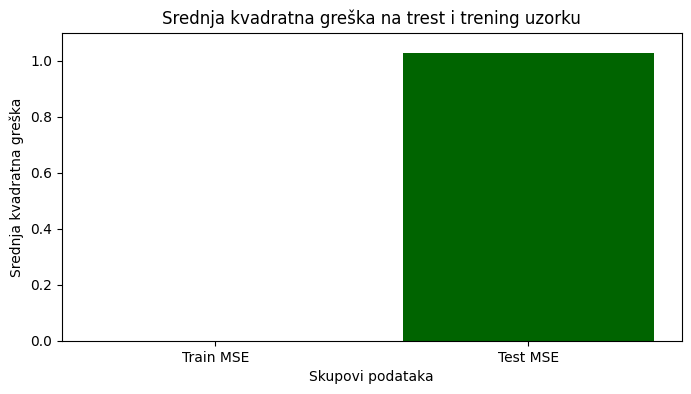

In [177]:
msee = ['Train MSE', 'Test MSE']
vrednosti = [mse_dt_train, mse_dt_test]

plt.figure(figsize=(8, 4))
plt.bar(msee, vrednosti, color=['lightgreen', 'darkgreen'])
plt.xlabel('Skupovi podataka')
plt.ylabel('Srednja kvadratna greška')
plt.title('Srednja kvadratna greška na trest i trening uzorku')
plt.ylim(0, 1.1)  
plt.show()

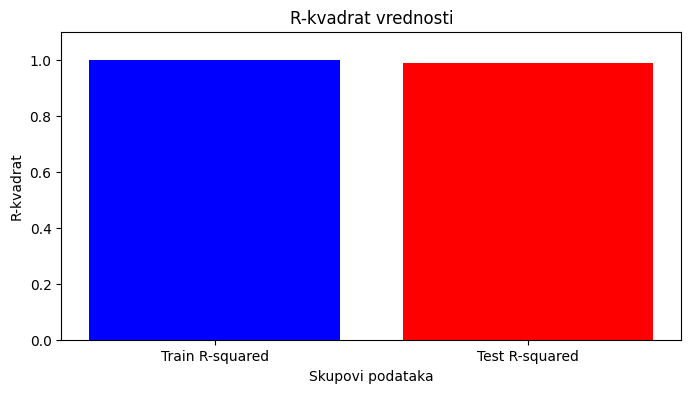

In [178]:
rr = ['Train R-squared', 'Test R-squared']
vrednosti = [r2_dt_train, r2_dt_test]
plt.figure(figsize=(8, 4))
plt.bar(rr, vrednosti, color=['blue', 'red'])
plt.xlabel('Skupovi podataka')
plt.ylabel('R-kvadrat')
plt.title('R-kvadrat vrednosti')
plt.ylim(0, 1.1) 
plt.show()

**UPOREDJIVANJE MODELA**

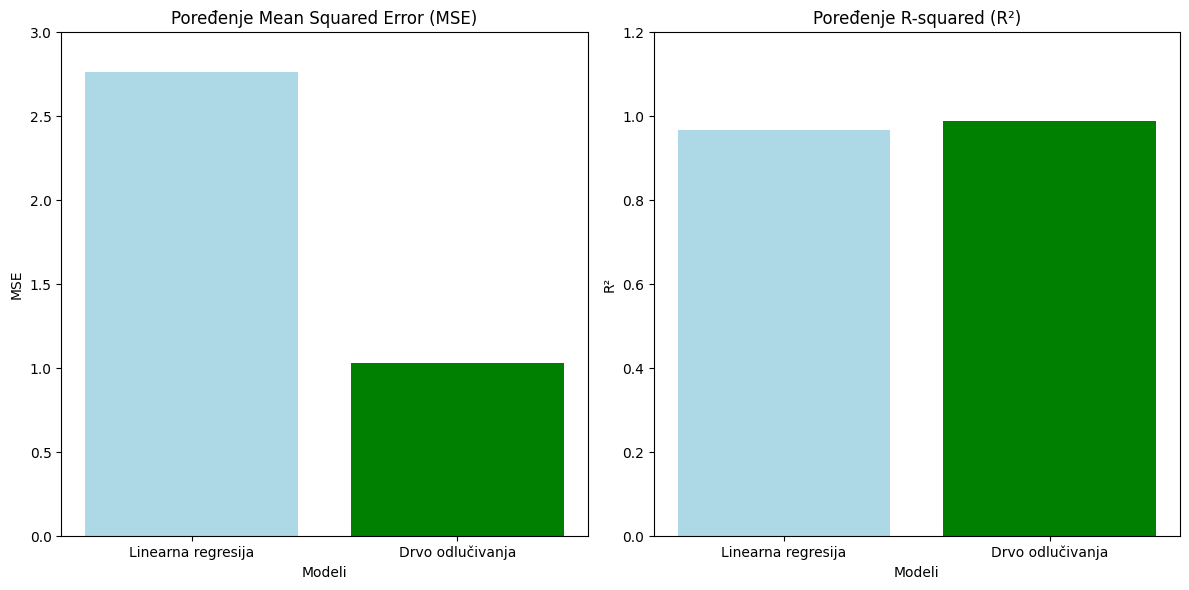

In [179]:
modeli_mse = ['Linearna regresija', 'Drvo odlučivanja']
mseee = [mse_lr_test, mse_dt_test]

modeli_r2 = ['Linearna regresija', 'Drvo odlučivanja']
msse = [r2_lr_test, r2_dt_test]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(modeli_mse, mseee, color=['lightblue', 'green'])
plt.title('Poređenje Mean Squared Error (MSE)')
plt.xlabel('Modeli')
plt.ylabel('MSE')
plt.ylim(0, 3)  

plt.subplot(1, 2, 2)
plt.bar(modeli_r2, msse, color=['lightblue', 'green'])
plt.title('Poređenje R-squared (R²)')
plt.xlabel('Modeli')
plt.ylabel('R²')
plt.ylim(0, 1.2)  

plt.tight_layout()
plt.show()


In [180]:
modeli = ['Linearna regresija', 'Drvo odlučivanja']
mseee = [mse_lr_test, mse_dt_test]
msse = [r2_lr_test, r2_dt_test]

df = pd.DataFrame({
    'Model': modeli,
    'MSE': mseee,
    'R-squared (R²)': msse
})
print(df)

                Model       MSE  R-squared (R²)
0  Linearna regresija  2.765837        0.968294
1    Drvo odlučivanja  1.028525        0.988210


In [ ]:
"""
Iako model drveta odlucivanja ima odredjenih problema za njega kazemo da je bolji
""""